In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

        
from zipfile import ZipFile
import shutil
import random
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
train_path = 'train.zip'
test_path = 'test1.zip'

In [3]:
DATA_PATH = '/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat'

# extract train data
with ZipFile(train_path, 'r') as zip_ref:
    zip_ref.extractall(DATA_PATH)
    
# extract test data
with ZipFile(test_path, 'r') as zip_ref:
    zip_ref.extractall(DATA_PATH)

In [4]:
print(f'Number of training images: {len(os.listdir(DATA_PATH + "/train"))}')
print(f'Number of test images: {len(os.listdir(DATA_PATH + "/test1"))}')

Number of training images: 25000
Number of test images: 12500


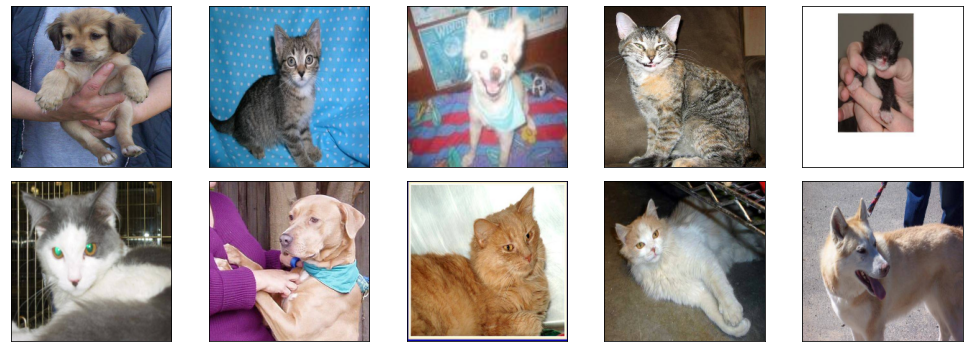

In [5]:
# path of extracted train images
# path = DATA_PATH + '/train'

# fig, axis = plt.subplots(2, 5, figsize = (14, 5))
# for ax, file in zip(axis.flatten(), os.listdir(path)[:10]):
#     img = cv2.imread(os.path.join(path, file))
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, (224, 224))
#     ax.imshow(img)
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.tight_layout()

In [6]:
# list of training files
train_files = os.listdir(path)
labels = []

for file in train_files:
    label = file.split('.')[0]
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)
        
train_df = pd.DataFrame({'file_names': train_files, 'labels': labels})

In [7]:
train_df.sample(10)

,file_names,labels
16174,cat.9580.jpg,0
2979,dog.11869.jpg,1
4417,cat.12231.jpg,0
2322,cat.10967.jpg,0
20607,dog.4423.jpg,1
17870,dog.120.jpg,1
21709,cat.9685.jpg,0
8083,dog.10056.jpg,1
22198,cat.9468.jpg,0
10884,dog.3652.jpg,1


In [8]:
train_df['labels'] = train_df['labels'].replace({0: 'cat', 1: 'dog'})
train_df.head()

,file_names,labels
0,dog.8011.jpg,dog
1,cat.5077.jpg,cat
2,dog.7322.jpg,dog
3,cat.2718.jpg,cat
4,cat.10151.jpg,cat


In [9]:
# split dataframe 
df_train, df_val = train_test_split(train_df, test_size = 0.12, stratify = train_df['labels'], random_state = 42)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [10]:
print(f'Shape of df_train: {df_train.shape}\nShape of df_val: {df_val.shape}')

Shape of df_train: (22000, 2)
Shape of df_val: (3000, 2)


In [11]:
df_train=df_train[0:10000]
df_train

,file_names,labels
0,dog.8114.jpg,dog
1,dog.7565.jpg,dog
2,dog.132.jpg,dog
3,cat.2423.jpg,cat
4,dog.9567.jpg,dog
...,...,...
9995,dog.6894.jpg,dog
9996,cat.1661.jpg,cat
9997,cat.2008.jpg,cat
9998,cat.2875.jpg,cat


In [12]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64

In [13]:
train_aug = ImageDataGenerator(rescale = 1 / 255.0, rotation_range = 30, zoom_range = 0.2, width_shift_range = 0.2,
                               height_shift_range = 0.2, shear_range = 0.2, brightness_range = (0.1, 0.9),
                               fill_mode = 'nearest', horizontal_flip = True)

train_gen = train_aug.flow_from_dataframe(df_train, path, x_col = 'file_names', y_col = 'labels', class_mode = 'categorical',
                                         target_size = IMAGE_SIZE, batch_size = BATCH_SIZE)


Found 10000 validated image filenames belonging to 2 classes.


In [14]:
# validation generator
val_aug = ImageDataGenerator(rescale = 1 / 255.0)

val_gen = val_aug.flow_from_dataframe(df_val, path, x_col = 'file_names', y_col = 'labels', class_mode = 'categorical',
                                     target_size = IMAGE_SIZE, batch_size = BATCH_SIZE)

Found 3000 validated image filenames belonging to 2 classes.


In [15]:
random_image = train_df.sample(1).reset_index(drop = True)
random_gen = train_aug.flow_from_dataframe(random_image, path, x_col = 'file_names', y_col = 'labels', 
                                           target_size = IMAGE_SIZE, class_mode = 'categorical')

Found 1 validated image filenames belonging to 1 classes.


In [16]:
# import libraries

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator, image
from tensorflow.keras import layers, Model
from tensorflow.keras.models import load_model
from scipy.spatial import distance
import cv2
import os,glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
batch_size =64

In [18]:
base_model = keras.applications.VGG16(include_top=False,input_shape= (224, 224, 3))
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(2,activation='sigmoid')

    
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [19]:
# training
history = model.fit(train_gen,steps_per_epoch=len(train_gen)//4,epochs=8,
        validation_data = val_gen)

Epoch 1/8
39/39 [==============================] - 585s 15s/step - loss: 0.6638 - accuracy: 0.6338 - val_loss: 0.3502 - val_accuracy: 0.8540
Epoch 2/8
39/39 [==============================] - 541s 14s/step - loss: 0.5446 - accuracy: 0.7267 - val_loss: 0.2847 - val_accuracy: 0.8770
Epoch 3/8
39/39 [==============================] - 540s 14s/step - loss: 0.4871 - accuracy: 0.7586 - val_loss: 0.2596 - val_accuracy: 0.8863
Epoch 4/8
39/39 [==============================] - 543s 14s/step - loss: 0.4847 - accuracy: 0.7548 - val_loss: 0.2155 - val_accuracy: 0.9100
Epoch 5/8
39/39 [==============================] - 542s 14s/step - loss: 0.4530 - accuracy: 0.7877 - val_loss: 0.2355 - val_accuracy: 0.8997
Epoch 6/8
39/39 [==============================] - 544s 14s/step - loss: 0.4647 - accuracy: 0.7736 - val_loss: 0.2039 - val_accuracy: 0.9157
Epoch 7/8
39/39 [==============================] - 544s 14s/step - loss: 0.4373 - accuracy: 0.7865 - val_loss: 0.2378 - val_accuracy: 0.8980
Epoch 8/8
39/

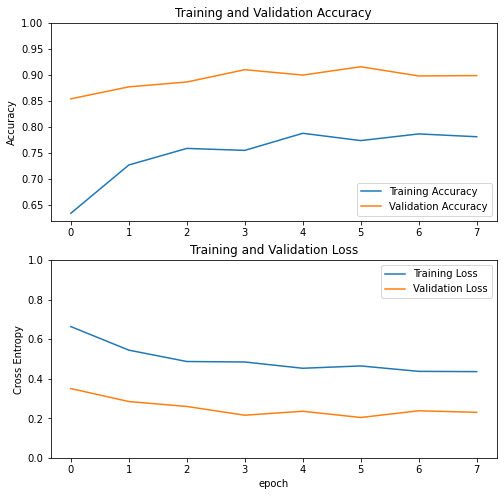

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
model.evaluate(val_gen)

47/47 [==============================] - 293s 6s/step - loss: 0.2301 - accuracy: 0.8987


[0.23009896278381348, 0.8986666798591614]

In [22]:
def GetXY(gen):
    listX = []
    listY = []
    for i in range(gen.__len__()):
        gennext = gen.next()
        listX.append(gennext[0])
        listY.append(gennext[1])
    x=np.concatenate(listX)
    y=np.concatenate(listY)
    return (x,y)
valX, valY = GetXY(val_gen)

In [23]:
predict = (model.predict(valX) > 0.5).astype("int32")
print(classification_report(valY,predict))
print(confusion_matrix(valY.argmax(axis=1), predict.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1500
           1       0.86      0.96      0.91      1500

   micro avg       0.90      0.90      0.90      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.91      0.90      0.90      3000
 samples avg       0.89      0.90      0.89      3000

[[1273  227]
 [  62 1438]]


/Users/lingyizhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.95764023 0.04807037]]


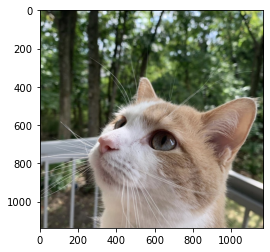

In [24]:
animal_img =  mpimg.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/IMG_0133.jpg')
plt.imshow(animal_img)


img = cv2.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/IMG_0133.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)


[[0.9651141  0.02864969]]


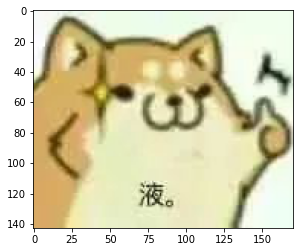

In [25]:
animal_img =  mpimg.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/IMG_0084.jpg')
plt.imshow(animal_img)


img = cv2.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/IMG_0084.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)


[[0.00518793 0.9948461 ]]


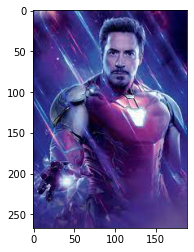

In [26]:
animal_img =  mpimg.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/irm.jpeg')
plt.imshow(animal_img)


img = cv2.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/irm.jpeg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)

[[0.00379655 0.99664605]]


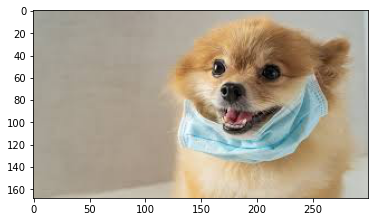

In [27]:
animal_img =  mpimg.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/dog2.jpeg')
plt.imshow(animal_img)


img = cv2.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/dog2.jpeg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)

In [28]:
#Fine tuning

base_model.trainable = True

model2 = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(2,activation='sigmoid')

    
])

model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [29]:
# Using EarlyStopping, end training when val_accuracy is not improved for 4 consecutive times
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',
                                patience=4,restore_best_weights=True)

# Using ReduceLROnPlateau, the learning rate is reduced by half when val_accuracy is not improved for 2 consecutive times
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,
                                patience=2,verbose=1)

# training
history = model2.fit(train_gen,steps_per_epoch=len(train_gen)//4,epochs=8,
        validation_data=val_gen,callbacks=[early_stopping,lr_scheduler])

Epoch 1/8
39/39 [==============================] - 1137s 29s/step - loss: 0.6641 - accuracy: 0.6162 - val_loss: 0.5285 - val_accuracy: 0.7863
Epoch 2/8
39/39 [==============================] - 1132s 29s/step - loss: 0.5292 - accuracy: 0.7492 - val_loss: 0.2946 - val_accuracy: 0.8867
Epoch 3/8
39/39 [==============================] - 1129s 29s/step - loss: 0.3950 - accuracy: 0.8353 - val_loss: 0.1907 - val_accuracy: 0.9290
Epoch 4/8
39/39 [==============================] - 1132s 29s/step - loss: 0.2891 - accuracy: 0.8886 - val_loss: 0.2762 - val_accuracy: 0.8923
Epoch 5/8
39/39 [==============================] - 1130s 29s/step - loss: 0.2453 - accuracy: 0.9038 - val_loss: 0.1341 - val_accuracy: 0.9530
Epoch 6/8
39/39 [==============================] - 1117s 29s/step - loss: 0.2267 - accuracy: 0.9158 - val_loss: 0.1294 - val_accuracy: 0.9540
Epoch 7/8
39/39 [==============================] - 1135s 29s/step - loss: 0.1809 - accuracy: 0.9303 - val_loss: 0.1100 - val_accuracy: 0.9583
Epoch 

In [30]:
model2.evaluate(val_gen)

47/47 [==============================] - 294s 6s/step - loss: 0.1066 - accuracy: 0.9637


[0.10664119571447372, 0.9636666774749756]

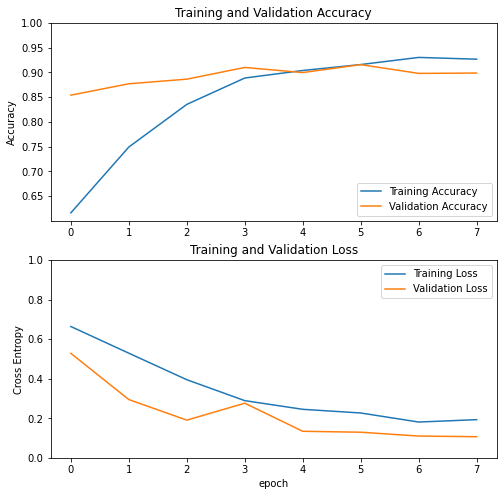

In [31]:
acc = history.history['accuracy']
bin_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [32]:
def GetXY(gen):
    listX = []
    listY = []
    for i in range(gen.__len__()):
        gennext = gen.next()
        listX.append(gennext[0])
        listY.append(gennext[1])
    x=np.concatenate(listX)
    y=np.concatenate(listY)
    return (x,y)

In [33]:
valX, valY = GetXY(val_gen)

In [34]:
predict = (model2.predict(valX) > 0.5).astype("int32")

In [35]:
print(confusion_matrix(valY.argmax(axis=1), predict.argmax(axis=1)))

[[1467   33]
 [  83 1417]]


In [36]:
print(classification_report(valY,predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1500
           1       0.97      0.95      0.96      1500

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000
 samples avg       0.96      0.96      0.96      3000



[[0.9094006 0.3354423]]


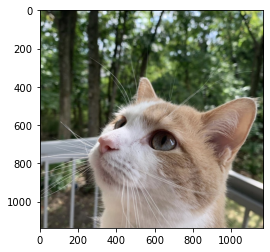

In [37]:
animal_img =  mpimg.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/IMG_0133.jpg')
plt.imshow(animal_img)


img = cv2.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/IMG_0133.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model2.predict(img)
print(classes)


[[0.58293366 0.14366853]]


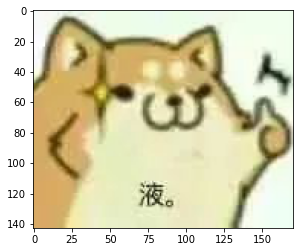

In [38]:
animal_img =  mpimg.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/IMG_0084.jpg')
plt.imshow(animal_img)


img = cv2.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/IMG_0084.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model2.predict(img)
print(classes)


[[0.00124773 0.9939003 ]]


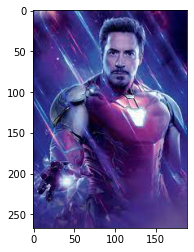

In [39]:
animal_img =  mpimg.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/irm.jpeg')
plt.imshow(animal_img)


img = cv2.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/irm.jpeg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model2.predict(img)
print(classes)


[[2.7747192e-06 9.9999213e-01]]


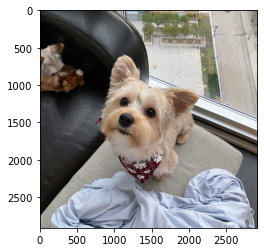

In [44]:
animal_img =  mpimg.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/WechatIMG688.jpeg')
plt.imshow(animal_img)


img = cv2.imread('/Users/lingyizhao/Desktop/MSCA 31009 Machine Learning/Cat/WechatIMG688.jpeg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model2.predict(img)
print(classes)
